# Исследование определяющих успешность игры закономерностей интернет-магазине «Стримчик»


В нашем распоряжении данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Для этого проведем предобработку данных, исследовательский анализ данных , а так же проверку гипотез на основе предоставленных данных.
 

# Цель иследования
1. Посмотреть, сколько игр выпускалось в разные годы. 
2. Посмотреть, как менялись продажи по платформам.
3. Выберать несколько потенциально прибыльных платформ.
4. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
5. Какие самые прибыльные жанры. Выделяются ли жанры с высокими и низкими продажами.
6. Составить портрет пользователя каждого региона
7. Проверить гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
8. Проверить гипотезы, что средние пользовательские рейтинги жанров Action и Sports разные


# Ход исследования
Данные о продажах получены из файла /datasets/games.csv.
О качестве данных ничего не известно. Поэтому перед тем, как преступать к целям исследования, понадобится обзор данных.

Я проверю данные на ошибки и ценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки в данных, которые не приведут к искажению конечного резульата. Далее, создам необходимые столбцы , и приступлю к исследовательскому анализу данных.

Таким образом, мое исследование пройдет в шести этапов:
1. Обзор данных
2. Предобработка данных 
3. Исследовательский анализ данных
4. Расчеты и добавление столбцов в таблицы
5. Проверка гипотиз
6. Расчеты для дополнительных задач исследования 

#### Шаг 1. Загрузка данных

##### Загрузим необходимы библиотеки для работы с данными

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

##### Загрузим данные из csv-файла в датафрейм c помощью библиотеки pandas

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Изучим общую инфомрацию о данных

In [3]:
print(df.info())
old_shape = df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Можно сделать вывод, что :
1) Следующие столбцы содержать пропуски ( дополнительно рассмортим каждый из них ниж) : Name,Year_of_Release, Genre, Critic_Score, User_Score, Rating
2) Переведем столбец Year_of_Release в int, а так же столбец User_Score в формат float 
3) Данные столбцы могут содержать неявные дубликаты, проверим ниже : Name , Platform , Genre
4) Столбцы Critic_Score и User_Score связаны логически и можно привести их к одному формату. Приведем Critic_Score к 10-бальному формату
5) Так же переведем названия столбцов в нижний регистр

#### Шаг 2. Предобработка данных

##### Приведем к нижнему регистру названия столбцов

In [4]:
df = df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release','Genre':'genre','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales'})

In [5]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Удаление пропусков

###### Столбец name

Посмотрим на строки, которые имеют пустые значения в толбце name

In [6]:
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Можно увидеть, что данные строки не имеют информационной пользы для обработки данных, так как они содержат пропуски  и в других столбцах. Удалим данные строки 

In [7]:
df = df.dropna(subset=['name'])

###### Столбец year_of_release

Всего значений с пропусками в столбце year_of_release = 269 ( что составляет ~ 1.6% от общего количетсва строк). Найти как таковую зависимость даты реализации от другого любого столбца датафрейма нет возможности, а так же нет смысла заполнять пропуски медианным значением по этому столбцу. Удалим данные пропуски

In [8]:
df = df.dropna(subset=['year_of_release'])
df = df.reset_index(drop=True)

###### Столбцы critic_score

В виду того, что количество пропусков в данном столбце слишкомбольшое - удалять все данные не будем. Заполнение пропусков в данном случае медианным значением может навредить статистику и повлиять на результаты анализа.Заменим пропуски значением равным -10
Но для использования влияния факторов оценки эти данные не смогут быть полезными, только для анализа влияния других факторов. 

In [9]:
df['critic_score'] = df['critic_score'].fillna(-10)

###### Столбец user_score

Так же заполним данный столбец значением -1 

In [10]:
df['user_score'] = df['user_score'].fillna(-1)

Можно заметить, что в данном столбце есть зачения tbd - что означает, что оценка еще не выставлено, можно рассматривать это значение как пропуск. Заменим это значение так же на -1

In [11]:
df.loc[df['user_score']=='tbd','user_score'] = -1

###### Столбец rating

По той же причине, что и в толбцах с оценками заменим пропуски в данном столбце значением - 'No rating'

In [12]:
df['rating'] = df['rating'].fillna('No rating')

###### Вывод по удалению пропусков

Проверим какую долю составяют удаленные данные

In [13]:
new_shape = df.shape[0]
print(1-new_shape/old_shape)

0.016212982351181626


Таким образом, мы удалили строки с пропуски в столбцах name, year_of_release - что составляет примерно 1.6 процентов исходныз данных ( небольшое значение) 
Так же пропуски в таких столбцах как critic_score, user_score, rating мы заменили значениями -10, -1, 'No rating' соответсвенно в виду того, что количество данных пропускв слишком велика.

##### Изменение типов данных

Посмотрим на информацию о данных еще раз

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


###### Столбец user_score

Переведем тип данных в данном столбце в формат float

In [15]:
df['user_score'] = df['user_score'].astype(float)

Так же для удобства сравнения оценок пользователей и критиков, увеличим все значения user_score в 10 раз.

In [16]:
df['user_score'] = df['user_score'] * 10

###### Столбец year_of_release

Так как в данном столбце указан только год, то нет смысла переводить его в специальный тип данных даты, однако можно перевести тип данного столбца в int

In [17]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


###### Вывод по изменению типов данных

Таким образом, только в двух столбцах нужна была замена типа данных: user_score на тип данных float, year_of_release на int Так же мы умножили все значения столбца user_score в 10 раз для удобства сравнения данных с critic_score

##### Дубликаты

###### Неявные дубликаты

Проверим на неявные дубликаты столбец platform

In [19]:
print(df['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Неявные дуликаты не обнаружены

Проверим на неявные дубликаты столбец genre

In [20]:
print(df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Неявные дуликаты не обнаружены

Проверим на неявные дубликаты столбец rating

In [21]:
print(df['rating'].unique())

['E' 'No rating' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Неявные дуликаты не обнаружены

Таким образом, неявные дубликаты не обнарудены в датафрейме

###### Неявных дубликатов строк, совпадающих по name, platform и year_of_release одновременно

In [22]:
print(df[df[['name','platform','year_of_release']].duplicated(keep=False)])

                name platform  year_of_release   genre  na_sales  eu_sales  \
600    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
15969  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
600         0.0         0.23          83.0        55.0      E  
15969       0.0         0.00          83.0        55.0      E  


Найден один дубликат .
Можно заметить, что совпадают все строки, кроме продаж, схлопним данные две строки в одну ( суммируем продажу eu_sales) 

In [23]:
df.loc[600, 'eu_sales'] = df.loc[600, 'eu_sales'] + 0.01
df = df.drop(15969)
df = df.reset_index(drop=True)
print(df[df[['name','platform','year_of_release']].duplicated(keep=False)])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


###### Явные дубликаты

Проверим, есть ли в датафрейме явные дубликаты

In [24]:
print(df.duplicated().sum())

0


Явные дубликаты так же не обнаружены

###### Вывод по дубликатам

В дата фрейме был обнаружен 1 неявный дубликат, так в данных был дубликат по совпадающим по названию, платформе и году релиза одновременно. Мы заметили, что значение оценок и рейтинг так же совпдает, по этому мы суммировали продажи и записали данные в одну строку.

##### Посчитайем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [25]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

##### Вывод по Предобработке данных

Таким образом для удобной работы с данными нами было проведено: 
1) Мы привели к нижнему регистру названия всех столбцов
2) мы удалили строки с пропуски в столбцах name, year_of_release - что составляет примерно 1.6 процентов исходныз данных ( небольшое значение) 
3) Так же пропуски в таких столбцах как critic_score, user_score, rating мы заменили значениями -10, -1, 'No rating' соответственно в виду того, что количество данных пропускв слишком велика.
4) только в двух столбцах необходимо было изменение типов данных в year_of_release на тип данных int, и в user_score на тип данных float. 
5) Так же мы умножили все значения столбца user_score в 10 раз для удобства сравнения данных с critic_score
6) В дата фрейме был обнаружен 1 неявный дубликат, так в данных был дубликат по совпадающим по названию, платформе и году релиза одновременно. Мы заметили, что значение оценок и рейтинг так же совпдает, по этому мы суммировали продажи и записали данные в одну строку.
7) Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.

#### Шаг 3 Исследовательский анализ данных

##### Посмотрим, сколько игр выпускалось в разные годы.

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


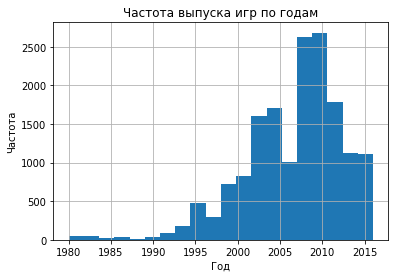

In [26]:
print(df['year_of_release'].describe())
df['year_of_release'].hist(bins=20);
plt.pyplot.title('Частота выпуска игр по годам');
plt.pyplot.xlabel("Год");
plt.pyplot.ylabel("Частота");

Таким образом, можно заметить, что в виду большо размаха данных, и небольшого колличества значений для периода до 1994 года и ранее, можно отсечь часть данных до 1994 года для удобства работы с ними.

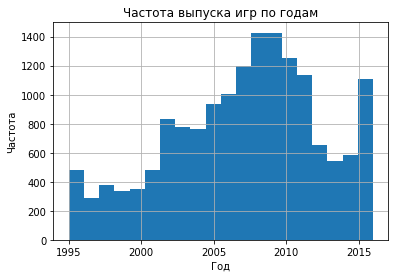

In [27]:
df = df.query('year_of_release > 1994')
df['year_of_release'].hist(bins=20)
plt.pyplot.title('Частота выпуска игр по годам');
plt.pyplot.xlabel("Год");
plt.pyplot.ylabel("Частота");

In [28]:
print(df['year_of_release'].describe())
new_shape = df.shape[0]
print(1 - new_shape/old_shape)

count    15957.000000
mean      2007.016419
std          5.033317
min       1995.000000
25%       2004.000000
50%       2008.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64
0.04534848938079572


###### Вывод по распределнию выпуска игр в разные годы

Заметим, что после удаления основные характеристики распределения данных не изменились. Среднее составляет 2007 год, а медианное 2008 год. Большенство данных распределено в промежутке от 2004 года до 2016 года.- что является нормальным для анализа

##### Посмотрите, как менялись продажи по платформам

###### Построим сводную таблицу в разрезе платформы

In [29]:
df_top_platforms = df.groupby(by='platform').agg({'total_sales':'sum','year_of_release':['max','min']})
df_top_platforms.columns = ['total_sales', 'last_year', 'first_year']
df_top_platforms = df_top_platforms.sort_values(by='total_sales', ascending=False)
df_top_platforms['platform_duration'] = df_top_platforms['last_year'] - df_top_platforms['first_year']
display(df_top_platforms)

,total_sales,last_year,first_year,platform_duration
platform,,,,
PS2,1233.56,2011,2000,11
X360,961.24,2016,2005,11
PS3,931.34,2016,2006,10
Wii,891.18,2016,2006,10
DS,802.76,2013,2004,9
PS,721.55,2003,1995,8
PS4,314.14,2016,2013,3
GBA,312.88,2007,2000,7
PSP,289.53,2015,2004,11


###### Посмотрим на распредление длительности существования платформы

count    26.000000
mean      6.346154
std       4.664267
min       0.000000
25%       3.250000
50%       6.000000
75%       9.750000
max      21.000000
Name: platform_duration, dtype: float64


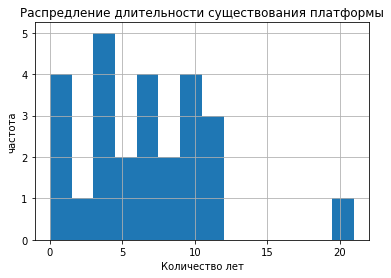

In [30]:
df_top_platforms['platform_duration'].hist(bins=14)
plt.pyplot.title('Распредление длительности существования платформы');
print(df_top_platforms['platform_duration'].describe())
plt.pyplot.xlabel("Количество лет");
plt.pyplot.ylabel("частота");

Можно сделать вывод, что средняя длительность существования платформы равна 6 лет, большенство платфор существую от 3 до 10 лет.
Так же можно заметить, что самые крупные по продажам платформы существую в среднем 10 лет.

###### Посмотрим на распределение продаж по годам у всех платформ

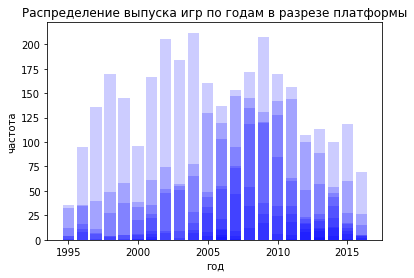

In [31]:
platforms = df['platform'].unique()

for item in platforms:              
    platform_data = df.query('platform == @item')[['year_of_release','total_sales']].groupby(by='year_of_release').agg({'total_sales':'sum'})
    plt.pyplot.bar(platform_data.index, platform_data['total_sales'], color='blue', alpha=0.2)
plt.pyplot.title('Распределение выпуска игр по годам в разрезе платформы');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Посмотрим на распределение продаж по годам у топ-5 платформ, а именно : PS2, X360, PS3, Wii, DS  

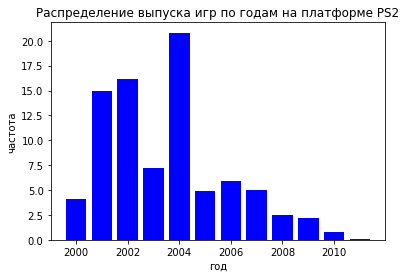

In [32]:
PS2_data = df.query('platform == "PS2"')[['year_of_release','total_sales']]
plt.pyplot.bar(PS2_data['year_of_release'], PS2_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе PS2');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

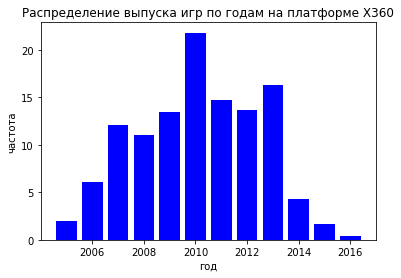

In [33]:
X360_data = df.query('platform == "X360"')[['year_of_release','total_sales']]
plt.pyplot.bar(X360_data['year_of_release'], X360_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе X360');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

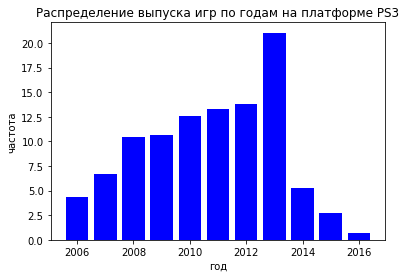

In [34]:
PS3_data = df.query('platform == "PS3"')[['year_of_release','total_sales']]
plt.pyplot.bar(PS3_data['year_of_release'], PS3_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе PS3');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

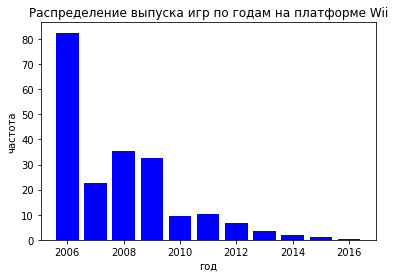

In [35]:
Wii_data = df.query('platform == "Wii"')[['year_of_release','total_sales']]
plt.pyplot.bar(Wii_data['year_of_release'], Wii_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе Wii');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

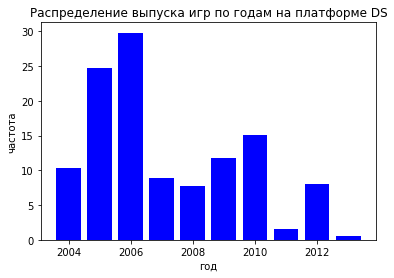

In [36]:
DS_data = df.query('platform == "DS"')[['year_of_release','total_sales']]
plt.pyplot.bar(DS_data['year_of_release'], DS_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе DS');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Таким образом, можно сделать вывод, что среди топ-5 самых больших платформ по выручки , большенство выручки распределено в период от 2006 года до 2016 года. У самой большой платформы - от 2000 года до 2010 года с постепенным спадом в прадажах и почти полным отсутствием продаж после 2010 года. 

###### Вывод по главе 3.2 ( Динамика продажи по платформам)

Исходя из того, что средняя продолжительность жизни платформы составляет 6 лет , а так же, что основные платформы генерировали продажи в период с 2006 года по 2016 год. 
Однако для целей нашего иследования ( прогноза продаж на 2017 год) - период в 6 лет является большим, скоротим его до 3 лет ( т.е. период 2014 - 2017 год) 
Создадим датафрейм с такими данными
Удаленные данны ( данные до 20014 года) несут в себе 1) информацию о старых платформах, которые перестали существовать после 2014 года - данные плотформы не будут актуальны для составления прогноза на 2017 год, а так же 2) продажи на актуальных платформам, однако с продажами до 2014 года - что так же является устаревшими данными для составленя прогноза на 2017 год. 

##### Возьмем данные за соответствующий актуальный период

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
Поменял датафрейм для анализа на актуальный после 2014 года) 
</div>

In [37]:
df_filtered = df[df['year_of_release'] >= 2014]
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB
None


In [38]:
df_top_platforms_filtered = df_filtered.groupby(by='platform').agg({'total_sales':'sum','year_of_release':['max','min']})
df_top_platforms_filtered.columns = ['total_sales', 'last_year', 'first_year']
df_top_platforms_filtered = df_top_platforms_filtered.sort_values(by='total_sales', ascending=False)
df_top_platforms_filtered['platform_duration'] = df_top_platforms_filtered['last_year'] - df_top_platforms_filtered['first_year']
display(df_top_platforms_filtered)

,total_sales,last_year,first_year,platform_duration
platform,,,,
PS4,288.15,2016,2014,2
XOne,140.36,2016,2014,2
3DS,86.68,2016,2014,2
PS3,68.18,2016,2014,2
X360,48.22,2016,2014,2
WiiU,42.98,2016,2014,2
PC,27.05,2016,2014,2
PSV,22.40,2016,2014,2
Wii,5.07,2016,2014,2


###### Вывод по актуальный периоду

Таким образом, например, мы отсекли самую большу платформу в исходны данных PS2 - теперь ее нет в акуальных данных. Данную неактуальность этой платформы можно посмотреть на графике распределения вырчки для данной платформы, можно увидеть там, что пик продаж приходился на 2004 год, а к 2010 году продажи приблизедись к нулю, что не будет актуально для составления прогноза на 2017 год.

##### Посмотрим на динамику продаж на платформах за последние 3 года

Посмторим на динамику продаж на всех платформах платформах в data_filtered и определим, какие из них растут или падаю 

In [39]:
platforms_increasing = []
platforms_decreasing = []

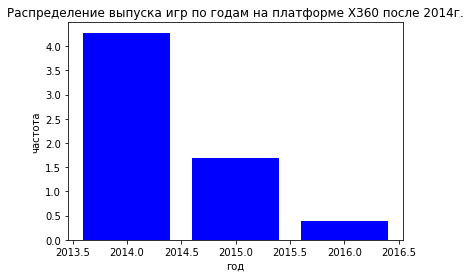

In [40]:
X360_data = df_filtered.query('platform == "X360"')[['year_of_release','total_sales']]
plt.pyplot.bar(X360_data['year_of_release'], X360_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе X360 после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Можно сделать вывод, что в последние годы продажи на  платформе X360 падают

In [41]:
platforms_decreasing.append('X360')

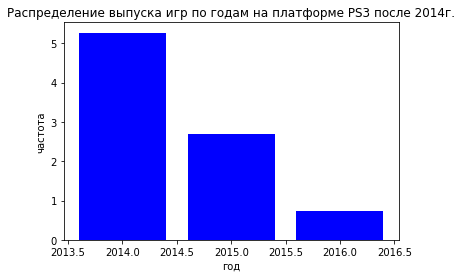

In [42]:
PS3_data = df_filtered.query('platform == "PS3"')[['year_of_release','total_sales']]
plt.pyplot.bar(PS3_data['year_of_release'], PS3_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе PS3 после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Можно сделать вывод, что в последние годы продажи на  платформе PS3 падают

In [43]:
platforms_decreasing.append('PS3')

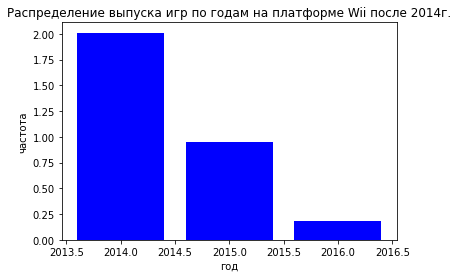

In [44]:
Wii_data = df_filtered.query('platform == "Wii"')[['year_of_release','total_sales']]
plt.pyplot.bar(Wii_data['year_of_release'], Wii_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе Wii после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Можно сделать вывод, что в последние годы продажи на  платформе Wii падают

In [45]:
platforms_decreasing.append('Wii')

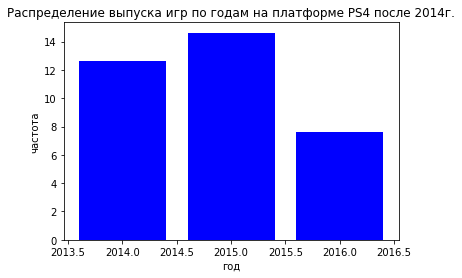

In [46]:
PS4_data = df_filtered.query('platform == "PS4"')[['year_of_release','total_sales']]
plt.pyplot.bar(PS4_data['year_of_release'], PS4_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе PS4 после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Несмотря на то, что в 2016 году оборот на плотформе меньше, чем в 2015 году, но ввиду того, что это новая платформа то добавим ее в список с возрастающими платформами

In [47]:
platforms_increasing.append('PS4')

Можно сделать вывод, что в последние годы продажи на  платформе PS2 падают

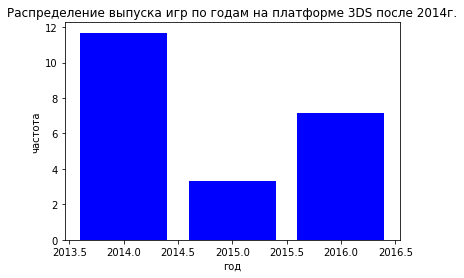

In [48]:
DS3_data = df_filtered.query('platform == "3DS"')[['year_of_release','total_sales']]
plt.pyplot.bar(DS3_data['year_of_release'], DS3_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе 3DS после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Отнесем данную платформу к растущим

In [49]:
platforms_increasing.append('3DS')

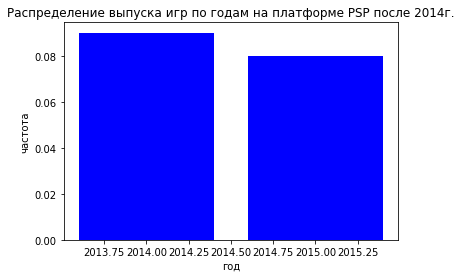

In [50]:
PSP_data = df_filtered.query('platform == "PSP"')[['year_of_release','total_sales']]
plt.pyplot.bar(PSP_data['year_of_release'], PSP_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе PSP после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Можно сделать вывод, что в последние годы продажи на  платформе PSP падают

In [51]:
platforms_decreasing.append('PSP')

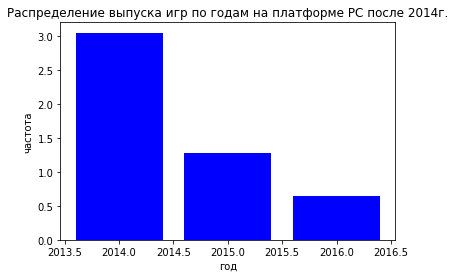

In [52]:
PC_data = df_filtered.query('platform == "PC"')[['year_of_release','total_sales']]
plt.pyplot.bar(PC_data['year_of_release'], PC_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе PC после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Можно сделать вывод, что в последние годы продажи на  платформе PC падают

In [53]:
platforms_decreasing.append('PC')

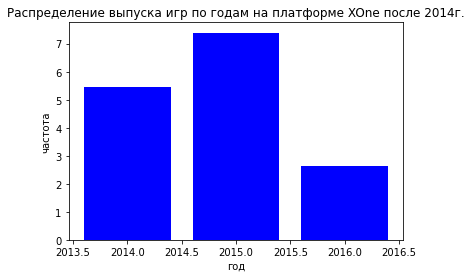

In [54]:
XOne_data = df_filtered.query('platform == "XOne"')[['year_of_release','total_sales']]
plt.pyplot.bar(XOne_data['year_of_release'], XOne_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе XOne после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Несмотря на то, что в 2016 году оборот на плотформе меньше, чем в 2015 году, но ввиду того, что это новая платформа то добавим ее в список с возрастающими платформами

In [55]:
platforms_increasing.append('XOne')

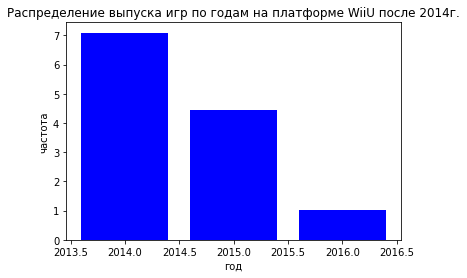

In [56]:
WiiU_data = df_filtered.query('platform == "WiiU"')[['year_of_release','total_sales']]
plt.pyplot.bar(WiiU_data['year_of_release'], WiiU_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе WiiU после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Можно сделать вывод, что в последние годы продажи на  платформе PC падают

In [57]:
platforms_decreasing.append('WiiU')

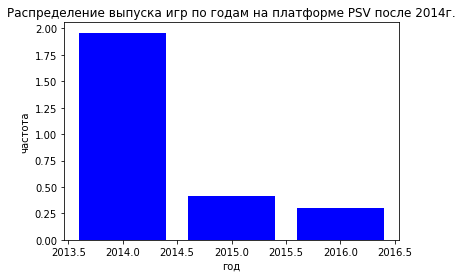

In [58]:
PSV_data = df_filtered.query('platform == "PSV"')[['year_of_release','total_sales']]
plt.pyplot.bar(PSV_data['year_of_release'], PSV_data['total_sales'], color='blue', alpha=1);
plt.pyplot.title('Распределение выпуска игр по годам на платформе PSV после 2014г.');
plt.pyplot.xlabel("год");
plt.pyplot.ylabel("частота");

Можно сделать вывод, что в последние годы продажи на  платформе PSV падают

In [59]:
platforms_decreasing.append('PSV')

Остальные платформы нет смысла рассматривать, так как они прекратили свое существование до 2008 года. Посмортим на растущие и падающие платформы соответственно

In [60]:
print(platforms_increasing)
print(platforms_decreasing)

['PS4', '3DS', 'XOne']
['X360', 'PS3', 'Wii', 'PSP', 'PC', 'WiiU', 'PSV']


Посморим на долю, которые в 2014 - 2016 году занимали эти платформы по реализации игр.

In [61]:
platform_leaders = platforms_increasing + platforms_decreasing
df_leaders_total = df_filtered.query('platform in @platform_leaders')

df_leaders_2014 = df_leaders_total.query('year_of_release == 2014')
df_leaders_2015 = df_leaders_total.query('year_of_release == 2015')
df_leaders_2016 = df_leaders_total.query('year_of_release == 2016')

df_leaders_total_gr = df_leaders_total.groupby(by='platform').agg({'total_sales':'sum'})
df_leaders_2014_gr = df_leaders_2014.groupby(by='platform').agg({'total_sales':'sum'})
df_leaders_2015_gr = df_leaders_2015.groupby(by='platform').agg({'total_sales':'sum'})
df_leaders_2016_gr = df_leaders_2016.groupby(by='platform').agg({'total_sales':'sum'})

df_leaders_2014_gr.columns = ['2014_sales']
df_leaders_2015_gr.columns = ['2015_sales']
df_leaders_2016_gr.columns = ['2016_sales']

df_leaders_grouped = df_leaders_total_gr.merge(df_leaders_2014_gr, on='platform', how='left')
df_leaders_grouped = df_leaders_grouped.merge(df_leaders_2015_gr, on='platform',how='left')
df_leaders_grouped = df_leaders_grouped.merge(df_leaders_2016_gr, on='platform',how='left')

df_leaders_grouped = df_leaders_grouped.sort_values(by='total_sales', ascending=False)

df_leaders_grouped_total_2014 = df_leaders_grouped['2014_sales'].sum()
df_leaders_grouped_total_2015 = df_leaders_grouped['2015_sales'].sum()
df_leaders_grouped_total_2016 = df_leaders_grouped['2016_sales'].sum()
df_leaders_grouped_total = df_leaders_grouped['total_sales'].sum()

df_leaders_grouped['total_part'] = df_leaders_grouped['total_sales']/df_leaders_grouped_total
df_leaders_grouped['2014_part'] = df_leaders_grouped['2014_sales']/df_leaders_grouped_total_2014
df_leaders_grouped['2015_part'] = df_leaders_grouped['2015_sales']/df_leaders_grouped_total_2015
df_leaders_grouped['2016_part'] = df_leaders_grouped['2016_sales']/df_leaders_grouped_total_2016

df_leaders_grouped['2016_part'] = df_leaders_grouped['2016_part'].fillna(0)
df_leaders_grouped['2016_sales'] = df_leaders_grouped['2016_sales'].fillna(0)


display(df_leaders_grouped)
print(len(df_leaders_total_gr)==len(df_leaders_grouped))  

,total_sales,2014_sales,2015_sales,2016_sales,total_part,2014_part,2015_part,2016_part
platform,,,,,,,,
PS4,288.15,100.00,118.90,69.25,0.395024,0.301632,0.443690,0.532938
XOne,140.36,54.07,60.14,26.15,0.192419,0.163092,0.224420,0.201247
3DS,86.68,43.76,27.78,15.14,0.118829,0.131994,0.103664,0.116515
PS3,68.18,47.76,16.82,3.60,0.093468,0.144059,0.062766,0.027705
X360,48.22,34.74,11.96,1.52,0.066105,0.104787,0.044630,0.011698
WiiU,42.98,22.03,16.35,4.60,0.058921,0.066449,0.061012,0.035401
PC,27.05,13.28,8.52,5.25,0.037083,0.040057,0.031793,0.040403
PSV,22.40,11.90,6.25,4.25,0.030708,0.035894,0.023323,0.032707
Wii,5.07,3.75,1.14,0.18,0.006950,0.011311,0.004254,0.001385


True


In [62]:
print(platforms_increasing)
print(platforms_decreasing)
print(df_leaders_grouped.loc['PS4','2016_part'] +df_leaders_grouped.loc['XOne','2016_part'] + df_leaders_grouped.loc['3DS','2016_part'] + df_leaders_grouped.loc['PS3','2016_part'] + df_leaders_grouped.loc['PC','2016_part']  )

['PS4', '3DS', 'XOne']
['X360', 'PS3', 'Wii', 'PSP', 'PC', 'WiiU', 'PSV']
0.9188086809296601


###### Вывод по динамике продаж на платформах за последние 10 лет

Если посмотреть на пересечения лидеров по реализации игры за 2014 - 2016 годы, а так же платформы которые находятся в стадии роста - то можно заметить, что все платформы в стадии роста занимают первые 3 строчки лидеров (PS4, XOne, 3DS). 
Так же добавим к потенциальным платформам две платформу в упадке (PC и PS3).
платформ PC - так как занимает самую большую долю в 2016 году среди падающих платформ 
платформа PS3 - так как занимает самую большую долю в период 2014 - 2016 среди падающих платформ

Таким образом мы определили 5 потенциальных платформ для реализации игр в 2017 году : PS4 , XOne , 3DS , PC и PS3 - в 2016 году они занимали долю на рынке , равную около 92 % 

##### Посомтрим на график «ящик с усами» по глобальным продажам игр в разбивке по платформам

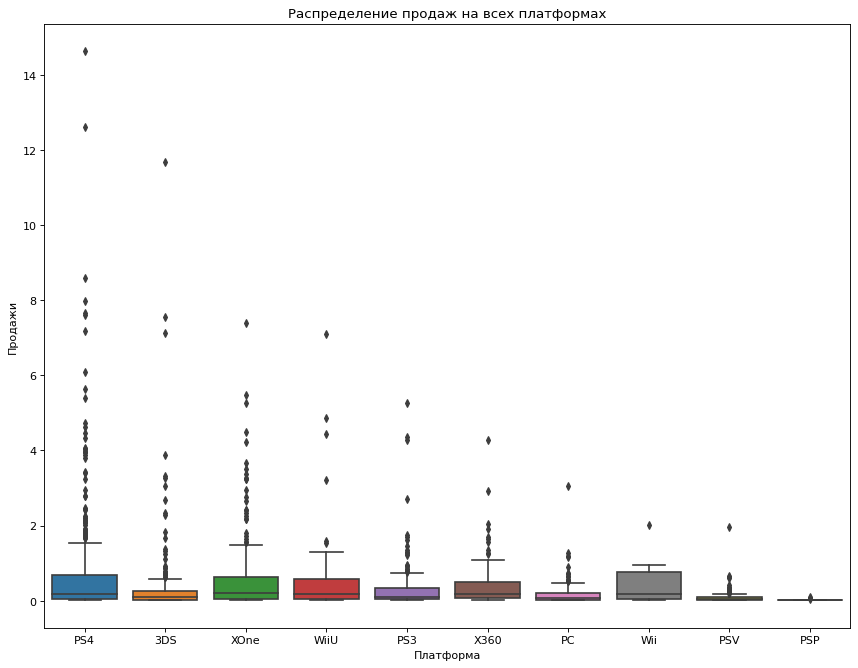

In [99]:
plt.pyplot.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='total_sales', data=df_filtered, notch=False);
plt.pyplot.title('Распределение продаж на всех платформах');
plt.pyplot.xlabel('Платформа');
plt.pyplot.ylabel('Продажи');

Можно сделать вывод, что медианное значения реализаций игр на различных платформах находится примерно на уровне примерно 0.4 млн копи. Однако можно заметить, что на всех платформам присутствуют  сверхпопулярные игры, которые имеют обороты реализации до 14 миллионов копий в год.

##### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

###### Корреляция оценок и продаж на платформе PS4

Коофициент корреляции равен = -0.04013158947269736


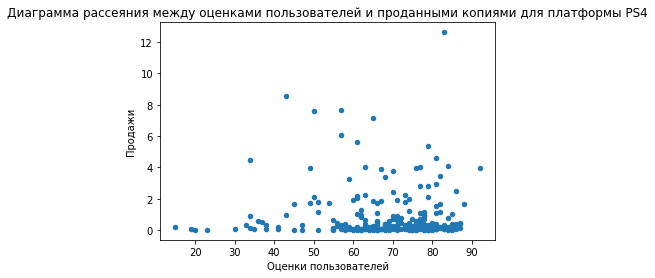

In [65]:
# не забудим удалить значения = -10
def corr_user(platform):
    df_filtered.query('platform==@platform & user_score != -10').plot(x='user_score', y='total_sales', kind='scatter') 
    plt.pyplot.title(f'Диаграмма рассеяния между оценками пользователей и проданными копиями для платформы {platform}');
    print('Коофициент корреляции равен =',df_filtered.query('platform==@platform & user_score != -10')['total_sales'].corr(df_filtered.query('platform==@platform & user_score != -10')['user_score']))
    plt.pyplot.ylabel("Продажи");
    plt.pyplot.xlabel("Оценки пользователей");

corr_user('PS4')

Можно заметить, что нет зависимости между оценками пользователей и продажами. Коофициент корреляции равен = -0.04
Посмотрим на зависимость на той же плотформе продаж от оценок критиков

Коофициент корреляции равен =  0.40266141068104083


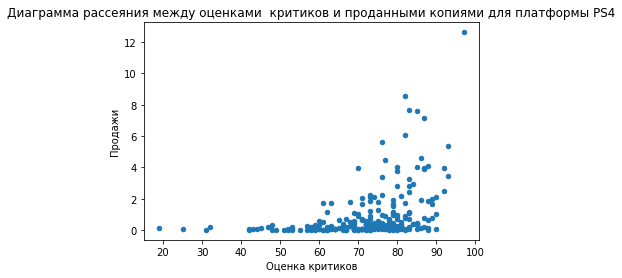

In [66]:
def corr_critic(platform):
    df_filtered.query('platform==@platform & critic_score != -10').plot(x='critic_score', y='total_sales', kind='scatter') 
    plt.pyplot.title(f'Диаграмма рассеяния между оценками  критиков и проданными копиями для платформы {platform}');
    print('Коофициент корреляции равен = ', df_filtered.query('platform ==@platform & critic_score != -10')['total_sales'].corr(df_filtered.query('platform==@platform & critic_score != -10')['critic_score']))
    plt.pyplot.ylabel("Продажи");
    plt.pyplot.xlabel("Оценка критиков");

corr_critic('PS4')

Можно заметить, что зависимость между оценками критиков и реализованным количеством копий существует, однако слабая зависимость. Коофициент корреляции = 0.4

###### Корреляция оценок и продаж на платформе XOne

Коофициент корреляции равен = -0.07038392806475827


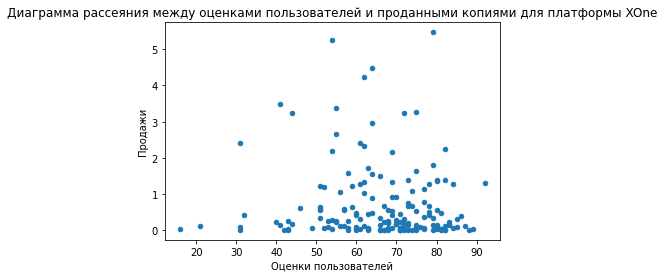

In [67]:
corr_user('XOne')

Можно заметить, что нет зависимости между оценками пользователей и продажами. Коофициент корреляции равен = -0.07
Посмотрим на зависимость на той же плотформе продаж от оценок критиков

Коофициент корреляции равен =  0.42867694370333226


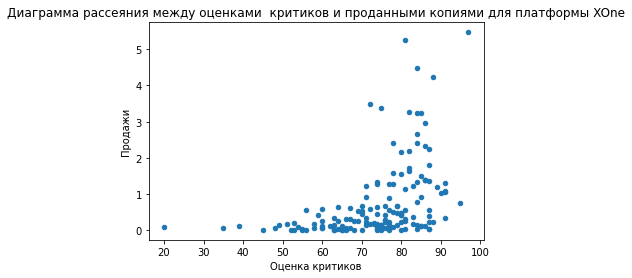

In [68]:
corr_critic('XOne')

Можно заметить, что зависимость между оценками критиков и реализованным количеством копий существует, однако слабая зависимость. Коофициент корреляции = 0.42

######  Корреляция оценок и продаж на платформе 3DS

Коофициент корреляции равен = 0.21519327185270287


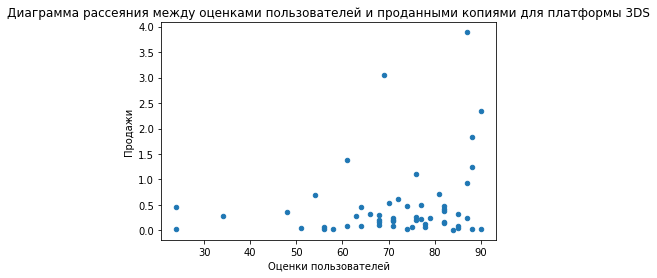

In [69]:
corr_user('3DS')

Можно заметить, что существует очень слабая полодительная зависимости между оценками пользователей и продажами. Коофициент корреляции равен = 0.21 Посмотрим на зависимость на той же плотформе продаж от оценок критиков

Коофициент корреляции равен =  0.31411749286905105


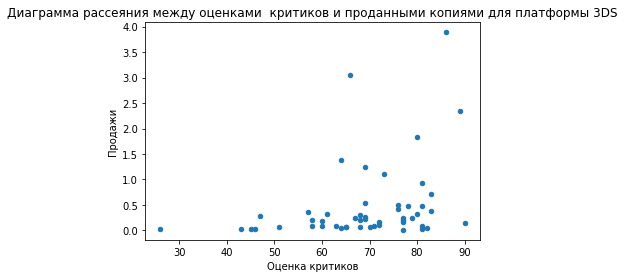

In [70]:
corr_critic('3DS')

Можно заметить, что зависимость между оценками критиков и реализованным количеством копий существует, однако слабая зависимость. Коофициент корреляции = 0.31

######  Корреляция оценок и продаж на платформе PC

Коофициент корреляции равен = -0.07159665703472459


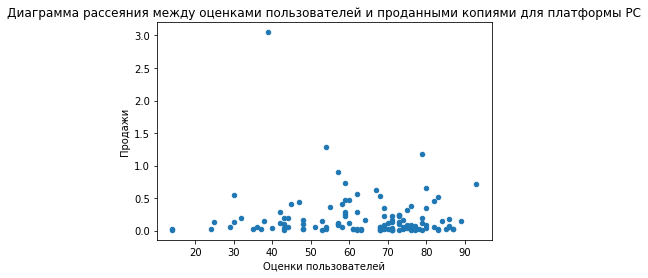

In [71]:
corr_user('PC')

Можно заметить, что нет зависимости между оценками пользователей и продажами. Коофициент корреляции равен = -0.07 Посмотрим на зависимость на той же плотформе продаж от оценок критиков

Коофициент корреляции равен =  0.17463413769350036


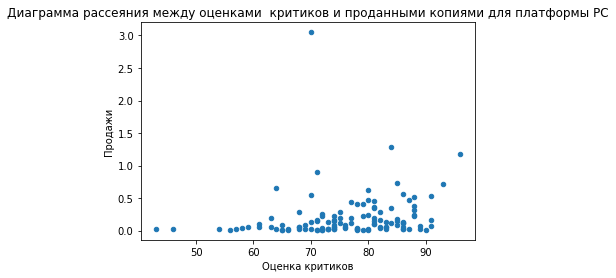

In [72]:
corr_critic('PC')

Можно заметить, что зависимость между оценками критиков и реализованным количеством копий существует, однако очень слабая зависимость. Коофициент корреляции = 0.17

######  Корреляция оценок и продаж на платформе PS3

Коофициент корреляции равен = -0.16676141347662102


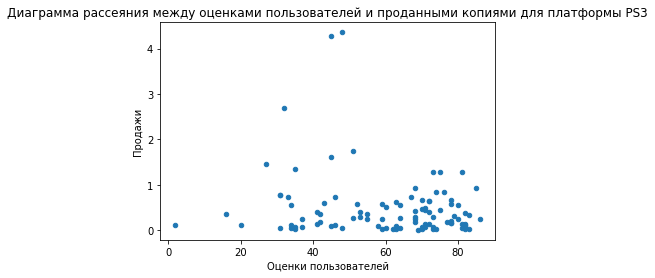

In [73]:
corr_user('PS3')

Можно заметить, что существует очень слабая отрицательная зависимости между оценками пользователей и продажами. Коофициент корреляции равен = -0.16 . Вероятнее всего на такой показатель оказали влияние выбросы. Будем рассматривать это как факт, что нет зависимости оценки пользователей от продаж на данной платформе

Посмотрим на зависимость на той же плотформе продаж от оценок критиков

Коофициент корреляции равен =  0.44657460493190704


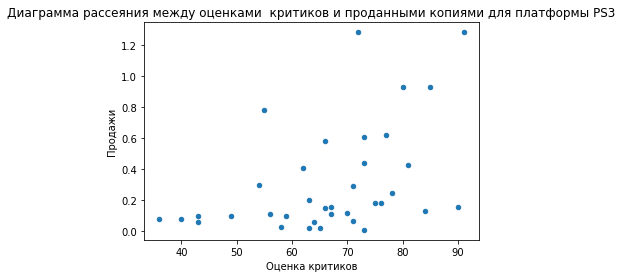

In [74]:
corr_critic('PS3')

Можно заметить, что зависимость между оценками критиков и реализованным количеством копий существует, однако cлабая зависимость. Коофициент корреляции = 0.44

###### Вывод по главе взаимосвязь продаж и оценок

Таким образом можно сделать вывод, что зависимости между оценкой пользователей и количеством продаж нет, однако есть слабая положительная зависимость между оценкой критиков и количеством продаж ( Коофициент корреляции равно 0.4).

##### Посмотрим на общее распределение игр по жанрам

In [75]:
print(df_filtered['genre'].value_counts())

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64


Заметим, что больше всего игры представлено в стиле Action, Sports, Misc, Adventure , Role-Playing. 
Посмотрим на то, какое распределение продаж по жанрам. 

,total_sales_sum,total_sales_median,total_sales_count
genre,,,
Shooter,170.94,0.515,128
Sports,109.48,0.180,161
Platform,18.09,0.140,38
Fighting,28.22,0.125,60
Role-Playing,101.44,0.110,221
Simulation,13.13,0.100,44
Action,199.36,0.090,619
Misc,37.55,0.090,113
Racing,27.52,0.090,69


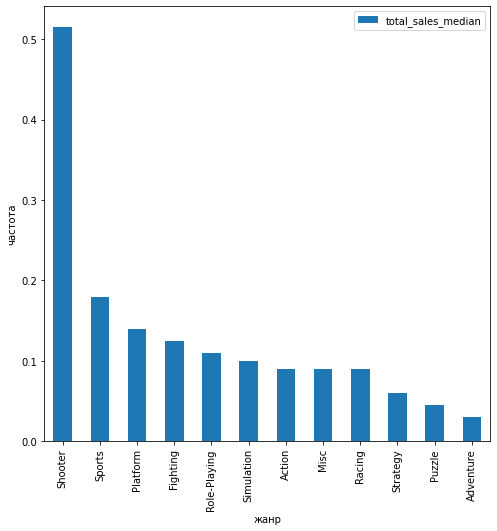

In [76]:
df_genre = df_filtered.groupby(by='genre').agg(total_sales_sum=('total_sales', 'sum'),total_sales_median=('total_sales', 'median'),total_sales_count=('total_sales', 'count')).sort_values(by='total_sales_median', ascending=False)
display(df_genre)
df_genre.plot(y='total_sales_median', kind='bar',figsize=(8,8),xlabel='жанр', ylabel='частота');

Таким образом, жанр игр с самым большим медиинным значением продаж равным 0.5 млн копий являеется Shooter. ( так же этот жанр занимает 2 место по оборотам продаж) 
так же в топ входят такие жанры как Sports, Platform, Fighting
Жанр игр Action	- встречается большое количество раз на различных платформах, а также является самым большим по оборотам продаж. 

Сделаем вывод, что в потенциальные жанры можно включить такие жанры как - Shooter, Sports, Platform, Fighting и Action

##### Вывод по Шагу 3 иследовательский анализ

Был проведен исследовательский анализ данных и были сделаны следующие вывод : 
1) Мы заметили, что разброс данных по годам является большим, поэтому мы отсекли часть данных до 1994 года для удобства работы с ними ( так как из немного) 
2) Мы заметили, что средний год в данных равен 2007 , а медианное значение равно  2008 . Большенство данных распределено в промежутке от 2004 года до 2016 года.
3) Мы рассмотрели распредление длительности существования платформы и заметили, что средняя длительность существования платформы равна 6 лет, большенство платфор существую от 3 до 10 лет. Так же можно заметить, что самые крупные по продажам платформы существую в среднем 10 лет. 
4) Мы рассмотрели распределение продаж по годам у всех платформ и заметили, что среди топ-5 самых больших платформ по продаж , большенство продаж распределено в период от 2006 года до 2016 года. У самой большой платформы - от 2000 года до 2010 года с постепенным спадом в прадажах и почти полным отсутствием продаж после 2010 года.
5) Несмотря на то, что средний период существования платформ равен 6 лет,  для целей нашего иследования ( прогноза продаж на 2017 год) - период в 6 лет является большим, скоротим его до 3 лет ( т.е. период 2014 - 2017 год)
6) Мы расмотрели распределение продаж по годам по каждой платформе и определили тех, которые в последние нессколько лет показывают рост - PS4, 3DS, XOne
7) Мы расмотрели платформы - лидеры продаж в 2014-2016 годы и определили лидеров -  PS4, XOne, 3DS, PS3, X360, WiiU, PC
8) Исходя из пунктов 6 и 7 Если посмотреть на пересечения лидеров по реализации игры за 2014 - 2016 годы, а так же платформы которые находятся в стадии роста - то можно заметить, что все платформы в стадии роста занимают первые 3 строчки лидеров (PS4, XOne, 3DS). Так же добавим к потенциальным платформам две платформу в упадке (PC и PS3). платформ PC - так как занимает самую большую долю в 2016 году среди падающих платформ , платформа PS3 - так как занимает самую большую долю в период 2014 - 2016 среди падающих платформ. Таким образом мы определили 5 потенциальных платформ для реализации игр в 2017 году : PS4 , XOne , 3DS , PC и PS3 - в 2016 году они занимали долю на рынке , равную около 92 % 
9) Мы расмотрели аномалии в продажах игр по платформам и замеили, что медианное значения реализаций игр на различных платформах находится примерно на уровне примерно 0.4 млн копии. Однако можно заметить, что на всех платформам присутствуют  сверхпопулярные игры, которые имеют обороты реализации до 14 миллионов копий в год.
10) Мы расммотрели корреляцию между продажами и оценками пользователей и критиков и сделали вывод, что зависимости между оценкой пользователей и количеством продаж нет, однако есть слабая положительная зависимость между оценкой критиков и количеством продаж ( Коофициент корреляции равно примерно 0.4 на потенциальных платформах)
11) Мы рассмотрели распределение продаж по жанрам и выделили топ-5 потенциальных жанров : жанр игр с самым большим медиинным значением продаж равным 0.5 млн копий являеется Shooter. (так же этот жанр занимает 2 место по оборотам продаж) так же в топ входят такие жанры как Sports, Platform, Fighting Жанр игр Action - встречается большое количество раз на различных платформах, а также является самым большим по оборотам продаж. Сделаем вывод, что в потенциальные жанры можно включить такие жанры как - Shooter, Sports, Platform, Fighting и Action

#### Составим портрет пользователя каждого региона

Рассмотрим топ платформ и жанров в регионах за предыдуший год, так как данный период наиболее точно характеризует текущие тренды 
Однако рассмотрим влиение оценки ESRB на продажу в отдельном периоде в разрезе периода 2006 - 2016 года

##### Найдем топ-5 платформ в разрезе по регионам

In [77]:
df_na = df_filtered.query('na_sales > 0')

Самые популярные платформы (топ-5)

Посмотрим, какие платформы в данном регионе входили в топ в 2016 году

In [78]:
df_na_paltform = df_na.query('year_of_release in (2014,2015,2016)').groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
df_na_paltform['part'] = df_na_paltform['na_sales']/df_na_paltform['na_sales'].sum()
display(df_na_paltform)

,na_sales,part
platform,,
PS4,98.61,0.347145
XOne,81.27,0.286102
X360,28.30,0.099627
3DS,22.64,0.079701
PS3,22.05,0.077624
WiiU,19.36,0.068155
PC,7.23,0.025452
PSV,2.52,0.008871
Wii,2.08,0.007322


Таким образом можно сделать вывод ,что в топ-5 популярных платформ в2014- 2016 году являются PS4, XOne, X360 , 3DS, PS3 - что сосоставляет 88 процентов

In [79]:
df_eu = df_filtered.query('eu_sales > 0')

Самые популярные платформы (топ-5)

Посмотрим, какие платформы в данном регионе входили в топ в 2014-2016 году

In [80]:
df_eu_paltform = df_eu.query('year_of_release in (2014,2015,2016)').groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
df_eu_paltform['part'] = df_eu_paltform['eu_sales']/df_eu_paltform['eu_sales'].sum()
display(df_eu_paltform)

,eu_sales,part
platform,,
PS4,130.04,0.480420
XOne,46.25,0.170866
PS3,25.54,0.094355
PC,17.97,0.066388
3DS,16.12,0.059554
X360,15.49,0.057226
WiiU,13.15,0.048581
PSV,3.53,0.013041
Wii,2.59,0.009568


Таким образом можно сделать вывод ,что в топ-5 популярных платформ в 2014 - 2016 году являются PS4, XOne, PS3, PC,  3DS  - что сосоставляет 87 процентов и слегка отличается топом от региона NA ( платформа PS4 занимает большую долю на рынке EU, чем в регионе NA) 

In [81]:
df_jp = df_filtered.query('jp_sales > 0')

Самые популярные платформы (топ-5)

Посмотрим, какие платформы в данном регионе входили в топ в 2014-2016 году

In [82]:
df_jp_paltform = df_jp.query('year_of_release in (2014,2015,2016)').groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
df_jp_paltform['part'] = df_jp_paltform['jp_sales']/df_jp_paltform['jp_sales'].sum()
display(df_jp_paltform)

,jp_sales,part
platform,,
3DS,44.24,0.475239
PS4,15.02,0.161349
PSV,14.54,0.156193
PS3,11.22,0.120529
WiiU,7.31,0.078526
PSP,0.36,0.003867
XOne,0.32,0.003438
X360,0.08,0.000859


Таким образом можно сделать вывод ,что в топ-5 популярных платформ в 2014-2016 году являются 3DS, PS4, PSV, PS3,  WiiU - что сосоставляет 99 процентов. топ-платформы различаются значительнее с двумя остальными регионами, так самую большую долю продаж имеет платформа 3DS, а так же платформа PSV имет внушительную долю в продажах в отличии от этой платформы на двух других регионов 

Создадим общую таблицу с долями по регионам

In [83]:
df_regions_platforms = df_na_paltform.merge(df_eu_paltform, on='platform', how='left')
df_regions_platforms = df_regions_platforms.merge(df_jp_paltform, on='platform', how='left')
df_regions_platforms = df_regions_platforms.rename(columns={'part_x': 'part_na', 'part_y': 'part_eu','part':'part_jp'})
df_regions_platforms['part_jp'] = df_regions_platforms['part_jp'].fillna(0)
df_regions_platforms['jp_sales'] = df_regions_platforms['jp_sales'].fillna(0)
display(df_regions_platforms)
print(len(df_na_paltform)==len(df_regions_platforms))

,na_sales,part_na,eu_sales,part_eu,jp_sales,part_jp
platform,,,,,,
PS4,98.61,0.347145,130.04,0.480420,15.02,0.161349
XOne,81.27,0.286102,46.25,0.170866,0.32,0.003438
X360,28.30,0.099627,15.49,0.057226,0.08,0.000859
3DS,22.64,0.079701,16.12,0.059554,44.24,0.475239
PS3,22.05,0.077624,25.54,0.094355,11.22,0.120529
WiiU,19.36,0.068155,13.15,0.048581,7.31,0.078526
PC,7.23,0.025452,17.97,0.066388,0.00,0.000000
PSV,2.52,0.008871,3.53,0.013041,14.54,0.156193
Wii,2.08,0.007322,2.59,0.009568,0.00,0.000000


True


,na_sales,part,part_group
platform,,,
PS4,98.61,0.347145,PS4
XOne,81.27,0.286102,XOne
X360,28.30,0.099627,X360
3DS,22.64,0.079701,3DS
PS3,22.05,0.077624,PS3
WiiU,19.36,0.068155,other
PC,7.23,0.025452,other
PSV,2.52,0.008871,other
Wii,2.08,0.007322,other


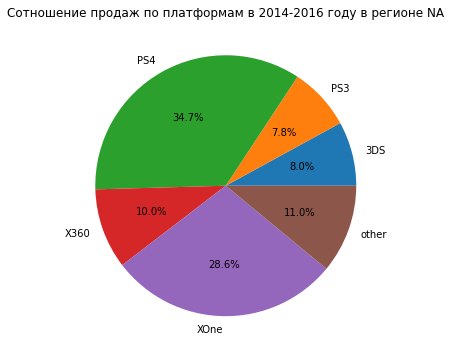

In [84]:
def categorize_part_na(row):
    part = row['part']
    if part < 0.07:
        return 'other'
    return row.name

df_na_paltform['part_group'] = df_na_paltform.apply(categorize_part_na,axis=1)
display(df_na_paltform)
df_na_paltform[['na_sales','part_group']].groupby('part_group')['na_sales'].sum().plot(y='part_group', kind='pie',figsize=(6,6),autopct='%1.1f%%',ylabel='');
plt.pyplot.title('Cотношение продаж по платформам в 2014-2016 году в регионе NA');

,eu_sales,part,part_group
platform,,,
PS4,130.04,0.480420,PS4
XOne,46.25,0.170866,XOne
PS3,25.54,0.094355,PS3
PC,17.97,0.066388,PC
3DS,16.12,0.059554,3DS
X360,15.49,0.057226,other
WiiU,13.15,0.048581,other
PSV,3.53,0.013041,other
Wii,2.59,0.009568,other


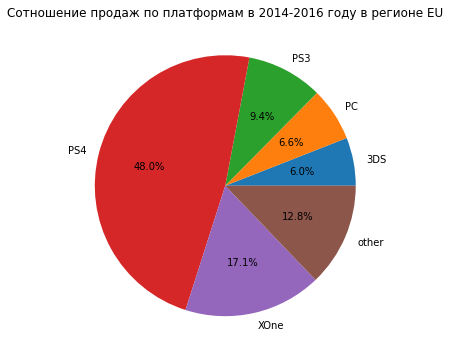

In [85]:
def categorize_part_eu(row):
    part = row['part']
    if part < 0.059:
        return 'other'
    return row.name

df_eu_paltform['part_group'] = df_eu_paltform.apply(categorize_part_eu,axis=1)
display(df_eu_paltform)
df_eu_paltform[['eu_sales','part_group']].groupby('part_group')['eu_sales'].sum().plot(y='part_group', kind='pie',figsize=(6,6),autopct='%1.1f%%', ylabel='');
plt.pyplot.title('Cотношение продаж по платформам в 2014-2016 году в регионе EU');

,jp_sales,part,part_group
platform,,,
3DS,44.24,0.475239,3DS
PS4,15.02,0.161349,PS4
PSV,14.54,0.156193,PSV
PS3,11.22,0.120529,PS3
WiiU,7.31,0.078526,WiiU
PSP,0.36,0.003867,other
XOne,0.32,0.003438,other
X360,0.08,0.000859,other


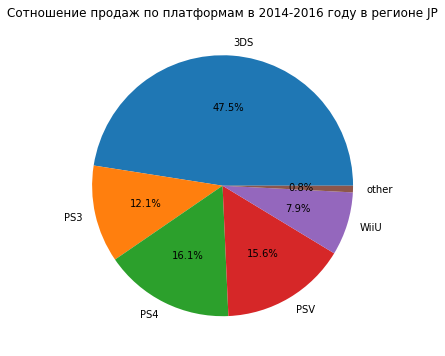

In [86]:
def categorize_part_jp(row):
    part = row['part']
    if part < 0.07:
        return 'other'
    return row.name

df_jp_paltform['part_group'] = df_jp_paltform.apply(categorize_part_jp,axis=1)
display(df_jp_paltform)
df_jp_paltform[['jp_sales','part_group']].groupby('part_group')['jp_sales'].sum().plot(y='part_group', kind='pie',figsize=(6,6),autopct='%1.1f%%',ylabel='');
plt.pyplot.title('Cотношение продаж по платформам в 2014-2016 году в регионе JP');

###### Вывод по топу платформ для разных регионов

Таким образом можно сделать вывод, что топ-5 платформ по продажам за 2014-2016 год 
в регионе NA являются PS4, XOne, X360 , 3DS, PS3, 
в регионе EU - PS4, XOne, PS3, PC , 3DS, 
в регионе JP - 3DS, PS4, PSV, PS3, WiiU

Можно заметить , что в сравнении регион NA и EU имеют одинаковый топ за исключением того факта, что платформа PS4 занимает большую часть рынка в регионе EU по сравнению с регионом NA. Регион JP имеет же больше различиц по платформам - большую часть продаж занимает платформа 3DS, в то время когда на двух других регионах эта платформа имеет гараздо меньшую долю, а так же в регионе наблюдается популярность среди падающих платформ PSV и WiiU.

##### Найдем топ-5 жанров в разрезе по регионам

,na_sales,part,part_group
genre,,,
Shooter,79.02,0.278181,Shooter
Action,72.53,0.255333,Action
Sports,46.13,0.162395,Sports
Role-Playing,33.47,0.117827,Role-Playing
Misc,15.05,0.052982,Misc
Fighting,12.43,0.043758,other
Racing,8.74,0.030768,other
Platform,6.79,0.023903,other
Adventure,5.64,0.019855,other


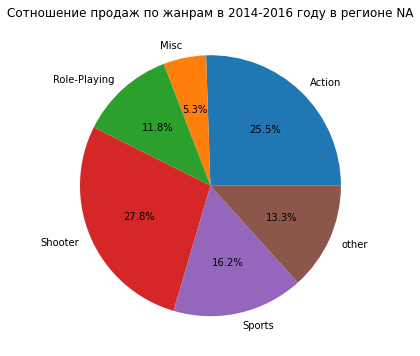

In [87]:
df_na_genre = df_na.query('year_of_release in (2014,2015,2016)').groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
df_na_genre['part'] = df_na_genre['na_sales']/df_na_genre['na_sales'].sum()
def categorize_part_na_g(row):
    part = row['part']
    if part < 0.05:
        return 'other'
    return row.name

df_na_genre['part_group'] = df_na_genre.apply(categorize_part_na_g,axis=1)
display(df_na_genre)
df_na_genre[['na_sales','part_group']].groupby('part_group')['na_sales'].sum().plot(y='part_group', kind='pie',figsize=(6,6),autopct='%1.1f%%',ylabel='');
plt.pyplot.title('Cотношение продаж по жанрам в 2014-2016 году в регионе NA');


Можно заметить, что топ-5 жанров в регионе NA в 2014-2016 году являются Shooter, Action , Sports , Role-Playing  , Music

,eu_sales,part,part_group
genre,,,
Action,74.68,0.275898,Action
Shooter,65.52,0.242057,Shooter
Sports,45.73,0.168945,Sports
Role-Playing,28.17,0.104071,Role-Playing
Racing,14.13,0.052202,Racing
Misc,12.86,0.047510,other
Simulation,7.30,0.026969,other
Platform,6.80,0.025122,other
Fighting,6.69,0.024716,other


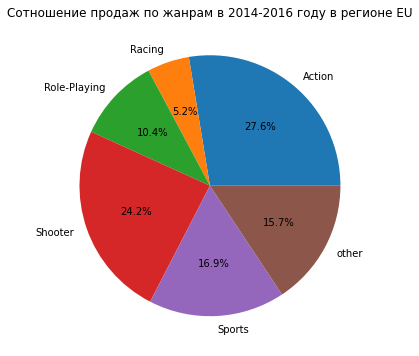

In [88]:
df_eu_genre = df_eu.query('year_of_release in (2014,2015,2016)').groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
df_eu_genre['part'] = df_eu_genre['eu_sales']/df_eu_genre['eu_sales'].sum()
def categorize_part_eu_g(row):
    part = row['part']
    if part < 0.05:
        return 'other'
    return row.name

df_eu_genre['part_group'] = df_eu_genre.apply(categorize_part_eu_g,axis=1)
display(df_eu_genre)
df_eu_genre[['eu_sales','part_group']].groupby('part_group')['eu_sales'].sum().plot(y='part_group', kind='pie',figsize=(6,6),autopct='%1.1f%%', ylabel='');
plt.pyplot.title('Cотношение продаж по жанрам в 2014-2016 году в регионе EU');

Можно заметить, что топ-5 жанров в регионе EU в 2016 году являются Action, Shooter, Sports, Role-Playing  , Racing.

,jp_sales,part,part_group
genre,,,
Role-Playing,31.16,0.334730,Role-Playing
Action,29.58,0.317757,Action
Fighting,6.37,0.068428,Fighting
Misc,5.61,0.060264,Misc
Shooter,4.87,0.052315,Shooter
Adventure,3.60,0.038672,other
Sports,3.26,0.035020,other
Platform,2.69,0.028897,other
Simulation,2.31,0.024815,other


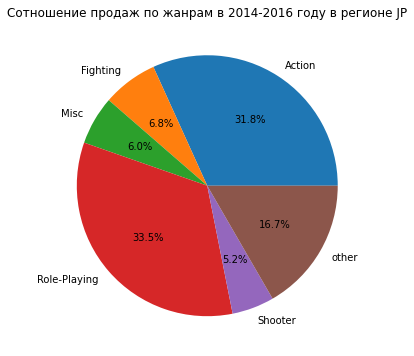

In [89]:
df_jp_genre = df_jp.query('year_of_release in (2014,2015,2016)').groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
df_jp_genre['part'] = df_jp_genre['jp_sales']/df_jp_genre['jp_sales'].sum()

def categorize_part_jp_g(row):
    part = row['part']
    if part < 0.05:
        return 'other'
    return row.name

df_jp_genre['part_group'] = df_jp_genre.apply(categorize_part_jp_g,axis=1)
display(df_jp_genre)
df_jp_genre[['jp_sales','part_group']].groupby('part_group')['jp_sales'].sum().plot(y='part_group', kind='pie',figsize=(6,6),autopct='%1.1f%%',ylabel='');
plt.pyplot.title('Cотношение продаж по жанрам в 2014-2016 году в регионе JP');

Можно заметить, что топ-5 жанров в регионе EU в 2016 году являются  Role-Playing, Action,Fighting, Misc, Shooter .

###### Вывод по топ жанрам по регионам

Таким образом, можно заметить , что d топ-5 жанров в NA регионе являются Shooter, Action , Sports , Role-Playing  , Music
в EU регионе Action, Shooter, Sports, Role-Playing  , Racing.
в JP регионе Role-Playing, Action,Fighting, Misc, Shooter.
Можем заметить, что NA и EU - схожие по жанрам , различия лишь в том, в NA регионе большую часть продаж занимает жанр Shooter, а в EU регионе - жанр Action. Больше отличается от этих двух регионов регион JP - большую часть продаж занимает Role-Playing, в то время  Action также занимает значительную часть рынка JP, жанр Shooter- занимает мальенькую часть рынка 

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


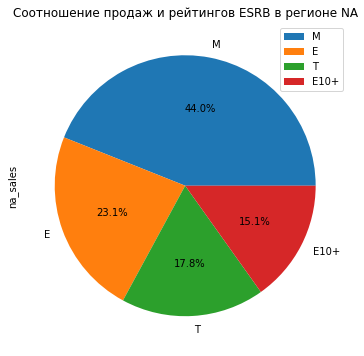

In [90]:
df_rating_na = df_na.query('rating!="No rating"').groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
df_rating_na.plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',subplots=True);
plt.pyplot.title('Соотношение продаж и рейтингов ESRB в регионе NA');
display(df_rating_na)

Таким образом, можно сделать вывод, что больше всего продаж в регионе NA соответствуют рейтингу ESRB равным E М T E10+. Можно так же заметить, что на рейтинг равный EC почти не приходится продаж

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


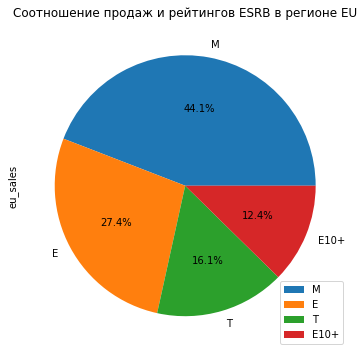

In [91]:
df_rating_eu = df_eu.query('rating!="No rating"').groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
df_rating_eu.plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',subplots=True);
plt.pyplot.title('Соотношение продаж и рейтингов ESRB в регионе EU');
display(df_rating_eu)

Так же как и в регионе NA - ретинг ESRB в регионе EU имеет такое же влияние на продажи - E, M, T, E10+ - имеют большие продажи, в то время как рейтинг равный RP не имеет продаж почти вовсе

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


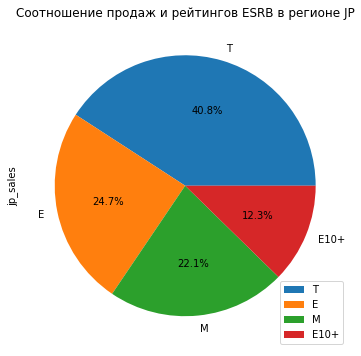

In [92]:
df_rating_jp = df_jp.query('rating!="No rating"').groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
df_rating_jp.plot(kind='pie',figsize=(6,6),autopct='%1.1f%%',subplots=True);
plt.pyplot.title('Соотношение продаж и рейтингов ESRB в регионе JP');
display(df_rating_jp)

Так же как и в других регионах, рейтинг ESRB имеет такое же влияние в регионе JP однако второе место в продажах занимает рейтинг равнй T вместо M.

###### Вывод по сравнению рейтингов ESRB

Проведя анализ влияние рейтинга на продажи по регионам, можно сделать вывод, что наблюдается тенденция в зависимости продаж и рейтингов ESRB среди всех регионов на одном уровне, так самым влияющим на продажи рейтингом является рейтинг равный E, второе и третье место занимают рейтинги равне М и Т, четвертое место - рейтинг E10+. Остальные рейтинги не влияют на продажи

##### Вывод по главе 4

Составим портрет пользователя каждого региона:
1) в NA регионе основными платформами являются PS4, XOne, X360 , 3DS, PS3, основными жанрами являются - Shooter, Action , Sports , Role-Playing  , Music
2) в регионе EU - PS4, XOne, PS3, PC , 3DSU, основными жанрами являются - Action, Shooter, Sports, Role-Playing  , Racing
3) в регионе JP - 3DS, PS4, PSV, PS3, WiiU,  основными жанрами являются -Role-Playing, Action,Fighting, Misc, Shooter 

Можно сделать вывод, что регионы NA  и EU больше похожи между собой в покупках игр, хотя и имеют небольшие различия. А регион JP имеет больше отличий от этих двух регионов.

Так же мы посмотрели, есть ли зависимость между объемом продаж и рейтингом ESRB и сделали вывод, что зависимость действительно есть. Можно наблюдать тенденцию в зависимости продаж и рейтингов ESRB среди всех регионов на одном уровне, так самым влияющим на продажи рейтингом является рейтинг равный E, второе и третье место занимают рейтинги равне М и Т, четвертое место - рейтинг E10+. Остальные рейтинги не влияют на продажи

#### Проверим гипотезы

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем нулевую гипотизу, Н0 равную 'Средние пользовательские рейтинги платформ Xbox One и PC равны', а так же альтернативную гипотизу, H1 'Средние пользовательские рейтинги платформ Xbox One и PC не равны'. Для проверки гипотизы используем Гипотеза о равенстве средних двух генеральных совокупностей ( независимых) , так как две средние не зависимы друг от друга.
Установим статистическую значимость на уровне 0.05

In [93]:
sample_XOne = df_filtered.query('platform=="XOne" & user_score != -10')['user_score']
sample_PC = df_filtered.query('platform=="PC" & user_score != -10')['user_score']

alpha = 0.05

results = st.ttest_ind(sample_XOne, sample_PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348478
Не получилось отвергнуть нулевую гипотезу


В виду того, что p-value равно 10.4 %, и так как это значение больше статистической значимости - то сделаем вывод ,что мы не будем отвергать гипотезу о том, что оценки пользователй на платформе Xbox One и PC равны. 

##### Средние пользовательские рейтинги жанров Action  и Sports  разные

Сформируем нулевую гипотизу, Н0 равную 'Средние пользовательские рейтинги жанров Action  и Sports равны', а так же альтернативную гипотизу, H1 'Средние пользовательские рейтинги жанров Action  и Sports не равны'. Для проверки гипотизы используем Гипотеза о равенстве средних двух генеральных совокупностей ( независимых) , так как две средние не зависимы друг от друга.
Установим статистическую значимость на уровне 0.05

In [94]:
sample_Action = df_filtered.query('genre=="Action" & user_score != -10')['user_score']
sample_Sports = df_filtered.query('genre=="Sports" & user_score != -10')['user_score']

alpha = 0.05

results = st.ttest_ind(sample_Action, sample_Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.871114798510669e-19
Отвергаем нулевую гипотезу


В виду того, что p-value равно очень малому числу, и так как это значение меньше статистической значимости - то сделаем вывод ,что можно отвергнуть гипотезу о том, что оценки пользователй игр жанра Action и Sports равны. 
Данные жанры сильно отличаются друг от друга, разные категории пользователей играют в эти игры - что и влияет на разные средние оценки по жанрам.

##### Выводы по главе Гипотезы

Мы проверили две гипотизы и пришли к следующем выводу:
1) Нельзя отвергнуть гипотезу о том, что оценки пользователй на платформе Xbox One и PC равны. 
2) можно отвергнуть гипотезу о том, что оценки пользователй игр жанра Action и Sports равны. Данные жанры сильно отличаются друг от друга, разные категории пользователей играют в эти игры - что и влияет на разные средние оценки по жанрам.

#### Общий вывод

Мы получили данные в по продажам и оценкам пользователей, критиков и рейтингов различных игр различных жанров на различных платформах по трем регионам (NA, EU, JP) .


Для удобной работы с данными нами было проведена предобработка данных, которая включала в себя :

1) Мы привели к нижнему регистру названия всех столбцов 
2) мы удалили строки с пропуски в столбцах name, year_of_release - что составляет примерно 1.6 процентов исходныз данных ( небольшое значение) 
3) Так же пропуски в таких столбцах как critic_score, user_score, rating мы заменили значениями -10, -1, 'No rating' соответственно в виду того, что количество данных пропускв слишком велика. 
4) только в двух столбцах необходимо было изменение типов данных в year_of_release на тип данных int, и в user_score на тип данных float. 
5) Так же мы умножили все значения столбца user_score в 10 раз для удобства сравнения данных с critic_score 
6) В дата фрейме был обнаружен 1 неявный дубликат, так в данных был дубликат по совпадающим по названию, платформе и году релиза одновременно. Мы заметили, что значение оценок и рейтинг так же совпдает, по этому мы суммировали продажи и записали данные в одну строку.
7) Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.

Далее мы провели иследовательский анализ данных и установили следующие характерные особенности в данных: 

1) Мы заметили, что разброс данных по годам является большим, поэтому мы отсекли часть данных до 1994 года для удобства работы с ними ( так как из немного) 
2) Мы заметили, что средний год в данных равен 2007 , а медианное значение равно  2008 . Большенство данных распределено в промежутке от 2004 года до 2016 года.
3) Мы рассмотрели распредление длительности существования платформы и заметили, что средняя длительность существования платформы равна 6 лет, большенство платфор существую от 3 до 10 лет. Так же можно заметить, что самые крупные по продажам платформы существую в среднем 10 лет. 
4) Мы рассмотрели распределение продаж по годам у всех платформ и заметили, что среди топ-5 самых больших платформ по продаж , большенство продаж распределено в период от 2006 года до 2016 года. У самой большой платформы - от 2000 года до 2010 года с постепенным спадом в прадажах и почти полным отсутствием продаж после 2010 года.
5) Несмотря на то, что средний период существования платформ равен 6 лет,  для целей нашего иследования ( прогноза продаж на 2017 год) - период в 6 лет является большим, скоротим его до 3 лет ( т.е. период 2014 - 2017 год)
6) Мы расмотрели распределение продаж по годам по каждой платформе и определили тех, которые в последние нессколько лет показывают рост - PS4, 3DS, XOne
7) Мы расмотрели платформы - лидеры продаж в 2014-2016 годы и определили лидеров -  PS4, XOne, 3DS, PS3, X360, WiiU, PC
8) Исходя из пунктов 6 и 7 Если посмотреть на пересечения лидеров по реализации игры за 2014 - 2016 годы, а так же платформы которые находятся в стадии роста - то можно заметить, что все платформы в стадии роста занимают первые 3 строчки лидеров (PS4, XOne, 3DS). Так же добавим к потенциальным платформам две платформу в упадке (PC и PS3). платформ PC - так как занимает самую большую долю в 2016 году среди падающих платформ , платформа PS3 - так как занимает самую большую долю в период 2014 - 2016 среди падающих платформ. Таким образом мы определили 5 потенциальных платформ для реализации игр в 2017 году : PS4 , XOne , 3DS , PC и PS3 - в 2016 году они занимали долю на рынке , равную около 92 % 
9) Мы расмотрели аномалии в продажах игр по платформам и замеили, что медианное значения реализаций игр на различных платформах находится примерно на уровне примерно 0.4 млн копии. Однако можно заметить, что на всех платформам присутствуют  сверхпопулярные игры, которые имеют обороты реализации до 14 миллионов копий в год.
10) Мы расммотрели корреляцию между продажами и оценками пользователей и критиков и сделали вывод, что зависимости между оценкой пользователей и количеством продаж нет, однако есть слабая положительная зависимость между оценкой критиков и количеством продаж ( Коофициент корреляции равно примерно 0.4 на потенциальных платформах)
11) Мы рассмотрели распределение продаж по жанрам и выделили топ-5 потенциальных жанров : жанр игр с самым большим медиинным значением продаж равным 0.5 млн копий являеется Shooter. (так же этот жанр занимает 2 место по оборотам продаж) так же в топ входят такие жанры как Sports, Platform, Fighting , Жанр игр Action - встречается большое количество раз на различных платформах, а также является самым большим по оборотам продаж. Сделаем вывод, что в потенциальные жанры можно включить такие жанры как - Shooter, Sports, Platform, Fighting и Action

Мы рассмотрели динамику продаж игр по платформам и жанрам в трех регионах и составили портрет пользователй для каждого региона:
1) в NA регионе основными платформами являются PS4, XOne, X360 , 3DS, PS3, основными жанрами являются - Shooter, Action , Sports , Role-Playing  , Music
2) в регионе EU - PS4, XOne, PS3, PC , 3DSU, основными жанрами являются - Action, Shooter, Sports, Role-Playing  , Racing
3) в регионе JP - 3DS, PS4, PSV, PS3, WiiU,  основными жанрами являются -Role-Playing, Action,Fighting, Misc, Shooter  

Можно сделать вывод, что регионы NA  и EU больше похожи между собой в покупках игр, хотя и имеют небольшие различия. А регион JP имеет больше отличий от этих двух регионов.

Так же мы посмотрели, есть ли зависимость между объемом продаж и рейтингом ESRB и сделали вывод, что зависимость действительно есть. Можно наблюдать тенденцию в зависимости продаж и рейтингов ESRB среди всех регионов на одном уровне, так самым влияющим на продажи рейтингом является рейтинг равный E, второе и третье место занимают рейтинги равне М и Т, четвертое место - рейтинг E10+. Остальные рейтинги не влияют на продажи

Мы рассмотрели гипотезы и заметили, что :
1) Нельзя отвергнуть гипотезу о том, что оценки пользователй на платформе Xbox One и PC равны. 
2) можно отвергнуть гипотезу о том, что оценки пользователй игр жанра Action и Sports равны. Данные жанры сильно отличаются друг от друга, разные категории пользователей играют в эти игры - что и влияет на разные средние оценки по жанрам.\


Таким образом, закономерности, определяющие успешность игры , которые понадобятся для планирования рекламной акции является: 
1) Размешение игр на потенциально прибыльных в 2017 году платформах - PS4 , XOne , 3DS , PC и PS3
2) Размешение игр таких жанров, как Shooter, Sports, Platform, Fighting и Action
3) Ориентация на рынок NA и EU - так как они больше , чем рынок JP, а так же данные два реигона похожи в большей степени. Рынок JP требудет индивидуального подхода
4) При выборе игр стоит обращать внимание на игры, которым был присвоен рейтинг ESRB равный E, M, T или E10+
5) При выборе игр НЕ стоит обращать на оценки пользователй игр, однако стоит обращать внимание на оценки критиков игры